<h1 style="text-align: center;">Waste Sorting Using Computer Vision using MobileNet</h1>


![waste%202.png](attachment:waste%202.png)

# 1. Problem Statement

Imagine if every piece of trash in the world could automatically find the right bin to go to! That’s the magic of computer vision with waste sorting. Sorting waste is essential for keeping our planet clean. When we sort waste correctly:

    Recyclables (like plastic bottles and cans) can be reused, which saves resources.
    Organic waste can be composted, helping plants grow.
    Non-recyclables go to landfills, but it’s better if we minimize them.

By training a computer to recognize waste, we can speed up sorting and reduce mistakes, helping the environment and recycling process.

# 2. Objectives

In this project, we will:

    Use computer vision to help identify types of waste.
    Train a model called MobileNet to "see" and categorize images as Organic (O) or Recyclable (R).
    Use a dataset of waste images, practice sorting them, and observe how the computer learns to differentiate between them.

# 3. Dataset Information

Our dataset contains images of waste items that belong to two categories:

    O (Organic): For food scraps, leaves, or other natural waste.
    R (Recyclable): For plastics, metals, and items that can be reused.

This dataset is organized into two folders:

    Train Folder: Where images are used to teach the computer what each type of waste looks like.
    Test Folder: To check if the computer has learned to sort images correctly.

Download Dataset Manually from Kaggle Website

    Go to the Kaggle website, navigate to the dataset you want (e.g., the "Waste Classification Data").
    URL for dataset used in this project : https://www.kaggle.com/datasets/techsash/waste-classification-data
    Click the URL and click Download to manually download the dataset as a ZIP file.
    Once downloaded, unzip the file and place it in your working directory.

# 4. Understanding MobileNet

Think of MobileNet as a quick learner that’s lightweight and fast. MobileNet is designed for mobile devices, making it perfect for applications where we don’t have a lot of computing power, like on phones or tablets. It can recognize objects by extracting features from images and comparing them to what it has learned.

    Lightweight: Works on mobile devices and runs fast.
    Good Accuracy: Efficiently identifies objects, like if an item is recyclable or organic.
    Feature Extraction: Takes essential details from images (like shapes and colors).

# 5. Code Implementation

Let’s walk through the code to see how we train MobileNet to sort waste images.

#### Import Libraries and Prepare Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'waste-classification-data' dataset.
Path to dataset files: /kaggle/input/waste-classification-data


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


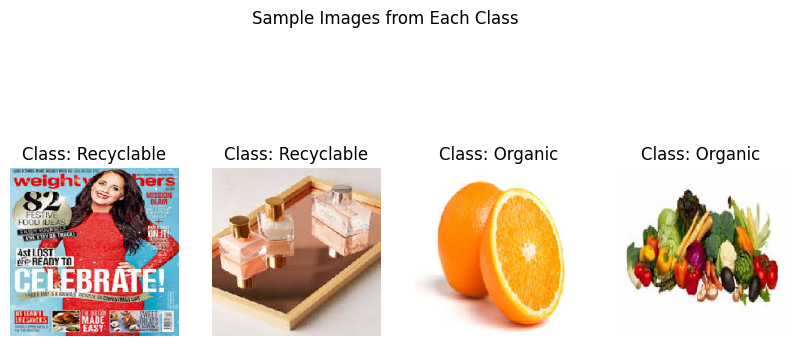

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths to the train and test directories
base_dir = r"/kaggle/input/waste-classification-data/DATASET"
train_dir = base_dir + r"/TRAIN"
test_dir = base_dir + r"/TEST"

# Use ImageDataGenerator to prepare the data for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Display sample images from each class
plt.figure(figsize=(10, 5))
for i in range(4):  # Display 4 images (2 from each class if available)
    image, label = next(train_data)
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

# Here, we are resizing images to 224x224 pixels, standard for MobileNet, and labeling them as binary (O or R).
# Also displaying the datasets


#### Load and Configure MobileNet Model

In [6]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet_model.trainable = False  # Freeze base model layers

# Add custom layers for classification
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# We start with a pre-trained MobileNet model, adding layers to classify waste images into O or R.


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Train the Model

In [7]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=2
)

# After training the model, save it to a file
model.save('mobilenet_waste_classifier.h5')

loss, accuracy = model.evaluate(test_data)
print("Model Accuracy:", accuracy)

# The model learns over 5 epochs, seeing images in the training data, adjusting itself, and testing on new images.

Epoch 1/2


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 144s 178ms/step - accuracy: 0.8705 - loss: 0.3022 - val_accuracy: 0.8846 - val_loss: 0.2677
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.9339 - loss: 0.1718 - val_accuracy: 0.8969 - val_loss: 0.2510


79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8960 - loss: 0.2380
Model Accuracy: 0.8969359397888184


#### Evaluate the Model

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step
Classification Report:
               precision    recall  f1-score   support

     Organic       0.56      0.63      0.59      1401
  Recyclable       0.44      0.37      0.40      1112

    accuracy                           0.51      2513
   macro avg       0.50      0.50      0.50      2513
weighted avg       0.51      0.51      0.51      2513

Confusion Matrix:
 [[879 522]
 [699 413]]


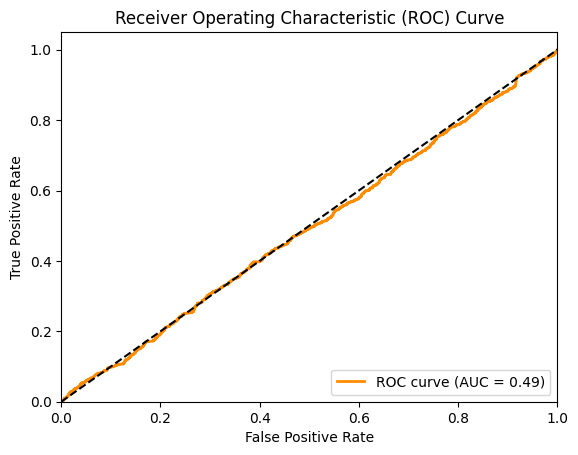

In [10]:

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Generate predictions
y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions
y_true = test_data.classes  # True labels from test data

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Organic', 'Recyclable']))

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Here, we measure the performance of the model.

# 6. Testing the model



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


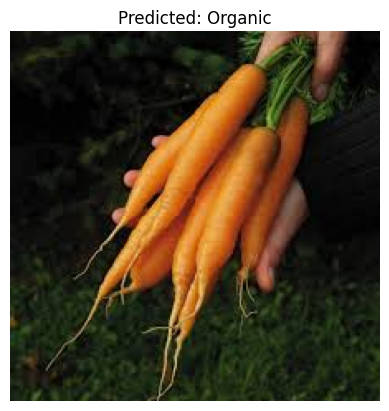

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the trained model and test image
model_path = 'mobilenet_waste_classifier.h5'
test_image_path = r"/kaggle/input/waste-classification-data/DATASET/TEST/O/O_12569.jpg"

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Load and prepare the test image
test_img = load_img(test_image_path, target_size=(224, 224))  # Load image and resize
test_img_array = img_to_array(test_img) / 255.0  # Normalize pixel values
test_img_array = np.expand_dims(test_img_array, axis=0)  # Add batch dimension

# Predict the class of the test image
predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 0.5 else 'Non Organic'

# Display the test image and prediction
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


# 7. Conclusion

By learning to identify waste, MobileNet becomes a helpful tool in sorting. This project highlights how computer vision can make real-life processes like waste sorting easier and faster. Using this setup, we can eventually create applications for recycling plants or even home use, contributing to a cleaner and more sustainable world.

![waste%201.png](attachment:waste%201.png)